In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as color
import numpy as np
import random

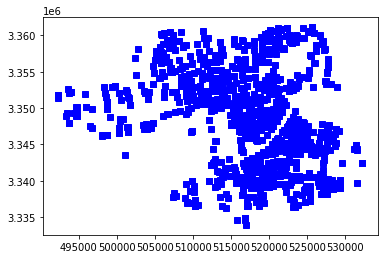

In [2]:
# data=np.load("杭州xyn.npy")
data=np.load("杭州mergedXY.npy")

# print(data)
demandCoordinates=[(data[i][0],data[i][1]) for i in range(data.shape[0])]
size=data.shape[0]
A=[(i,j) for i in range(size) for j in range(size)]
N=[i for i in range(size)]
pop_density=np.load("pop_density.npy")
for xy in demandCoordinates:
    plt.plot(xy[0],xy[1],c="b",marker="s")
pop_sum=np.sum(pop_density)
pop_average=pop_sum/size

In [3]:
# cof=1.2
# ablty=pop_average*10
# p=cof*np.sum(pop_density)/ablty
# q=[pop_density[i] for i in N]
q=[pop_density[i] for i in N]
p=10000
ablty=1.01*pop_sum/p
ablty

1000.3895529411765

In [4]:

geo_dis={(i,j):np.hypot(demandCoordinates[i][0]-demandCoordinates[j][0],demandCoordinates[i][1]-demandCoordinates[j][1]) for i,j in A}   # 几何距离
# od=np.load("杭州ODN.npy")
od=np.load("杭州mergedOD.npy")   # np格式的od矩阵
od_dis={(i,j):od[i][j] for i,j in A}  # 字典格式的od矩阵
dis=od_dis

In [5]:
from gurobipy import Model, GRB , quicksum

In [6]:
mdl=Model("p-center")


Set parameter Username
Academic license - for non-commercial use only - expires 2023-05-12


In [7]:
x=mdl.addVars(A,vtype=GRB.CONTINUOUS,ub=1,lb=0)
# x=mdl.addVars(A,vtype=GRB.BINARY)
n=mdl.addVars(N,vtype=GRB.INTEGER)
mdl.update()

In [8]:
mdl.ModelSense=GRB.MINIMIZE
mdl.setObjective(quicksum(x[i,j]*dis[i,j]*q[j] for i,j in A))

In [9]:
mdl.addConstrs(quicksum(x[i,j] for j in N)== 1 for i in N);

In [10]:
mdl.addConstr(quicksum(n[i] for i in N )== p);

In [15]:
mdl.addConstrs((quicksum(q[i]*x[i,j] for i in N)<=n[j]*ablty )for j in N);

In [16]:
mdl.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 3981 rows, 2115570 columns and 5790900 nonzeros
Model fingerprint: 0x1e1b5a80
Variable types: 2114116 continuous, 1454 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [6e+03, 4e+08]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+04]

MIP start from previous solve did not produce a new incumbent solution
MIP start from previous solve violates constraint R3599 by 8952.941176471

Found heuristic solution: objective 1.985901e+11
Presolve removed 1073 rows and 1 columns
Presolve time: 2.66s
Presolved: 2908 rows, 2115569 columns, 4231138 nonzeros
Variable types: 2114116 continuous, 1453 integer (0 binary)

Starting sifting (using dual simplex for sub-problems)...

    Iter     Pivots    Primal Obj      Dual Obj        Time
       0          0     infinity      0.0000000e+0

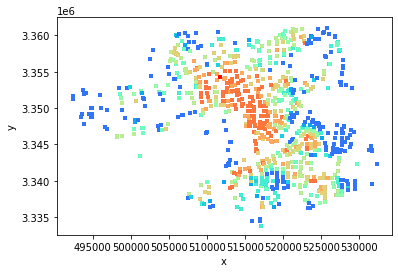

In [17]:
# 画所有点及标注需求
markersize=3
linewidth=0.5
for i in N:
    xy=demandCoordinates[i]
    plt.plot(xy[0],xy[1],c="b",marker="s",markersize=markersize)
    #plt.text(xy[0],xy[1],f"{q[i]}")
norm=color.Normalize(vmax=13,vmin=0)
# 画需求量
for i in N:
    if (n[i].x>0):
        xy=demandCoordinates[i]
        col=plt.cm.rainbow
        nMax=0.0
        for ni in N:
            # print(type(n[ni].x),n[ni].x,type(nMax))
            if n[ni].x>nMax:
                nMax=n[ni].x
        # norm=color.Normalize(vmax=round(nMax)+1,vmin=0)
        plt.plot(xy[0],xy[1],marker="s",color=col(norm(n[i].x)),markersize=markersize)
        # plt.text(xy[0]-5,xy[1]-5,f"{n[i].x}",color="b")
        

# # 画供应线
# for i,j in A:
#     if x[i,j].x>0.0:
#         demandCoordinates[i][0],demandCoordinates[i][1]
#         demandCoordinates[j][0],demandCoordinates[j][1]
#         plt.plot([demandCoordinates[i][0],demandCoordinates[j][0]],[demandCoordinates[i][1],demandCoordinates[j][1]],color="r",linewidth=linewidth)



plt.xlabel("x")
plt.ylabel("y")
plt.show()
    

In [ ]:
sum=0
tt=[]
for i in N:
    print(round(n[i].x),end=",")
    tt.append(round(n[i].x))
(tt)

253,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,8,8,2,6,7,7,8,7,2,2,8,8,2,2,8,8,8,8,8,2,2,4,4,7,7,7,8,6,6,6,8,3,3,8,2,5,6,7,3,6,6,2,6,6,6,6,2,2,2,2,2,2,6,2,2,6,3,3,2,6,6,6,6,2,2,5,9,2,7,6,6,7,2,2,2,7,7,8,8,8,8,8,8,2,8,8,8,8,8,8,2,8,8,5,6,9,4,9,7,9,9,3,3,6,8,9,2,6,6,6,5,6,2,2,2,2,8,8,8,8,8,8,8,8,2,6,6,6,2,6,6,6,6,6,3,3,2,2,8,8,8,8,8,8,8,8,8,8,8,8,7,2,2,2,2,2,8,8,7,2,8,7,3,7,7,7,8,2,2,9,9,2,2,8,8,5,5,2,10,10,6,2,2,2,9,8,8,8,8,8,9,8,9,9,10,6,7,11,2,6,10,10,5,9,9,7,4,9,8,10,9,11,9,10,11,11,2,11,2,6,6,2,2,11,2,6,11,2,2,11,11,11,11,8,10,9,11,9,9,3,5,2,3,2,2,8,5,8,2,9,9,9,8,8,8,9,9,8,8,7,7,7,10,8,8,10,2,4,4,5,4,5,9,10,10,9,8,8,8,11,11,11,5,11,9,9,9,9,2,2,2,2,11,9,10,2,7,2,2,11,11,10,10,10,10,10,2,10,2,9,9,9,2,8,2,2,2,10,11,11,11,10,8,11,11,2,10,8,2,11,11,9,9,10,10,10,10,10,10,9,9,9,10,10,8,8,8,11,10,10,11,11,10,9,9,9,9,11,9,10,11,11,10,11,10,10,10,10,10,11,2,7,2,2,6,10,10,2,5,5,9,5,11,5,11,11,11,10,10,11,11,11,11,9,8,11,11,9,11,9,11,11,11,9,11,5,5,11,11,11,11,11,11,11,11,11,10,10,5,11

[253,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 8,
 8,
 2,
 6,
 7,
 7,
 8,
 7,
 2,
 2,
 8,
 8,
 2,
 2,
 8,
 8,
 8,
 8,
 8,
 2,
 2,
 4,
 4,
 7,
 7,
 7,
 8,
 6,
 6,
 6,
 8,
 3,
 3,
 8,
 2,
 5,
 6,
 7,
 3,
 6,
 6,
 2,
 6,
 6,
 6,
 6,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 2,
 2,
 6,
 3,
 3,
 2,
 6,
 6,
 6,
 6,
 2,
 2,
 5,
 9,
 2,
 7,
 6,
 6,
 7,
 2,
 2,
 2,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 2,
 8,
 8,
 8,
 8,
 8,
 8,
 2,
 8,
 8,
 5,
 6,
 9,
 4,
 9,
 7,
 9,
 9,
 3,
 3,
 6,
 8,
 9,
 2,
 6,
 6,
 6,
 5,
 6,
 2,
 2,
 2,
 2,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 2,
 6,
 6,
 6,
 2,
 6,
 6,
 6,
 6,
 6,
 3,
 3,
 2,
 2,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 2,
 2,
 2,
 2,
 2,
 8,
 8,
 7,
 2,
 8,
 7,
 3,
 7,
 7,
 7,
 8,
 2,
 2,
 9,
 9,
 2,
 2,
 8,
 8,
 5,
 5,
 2,
 10,
 10,
 6,
 2,
 2,
 2,
 9,
 8,
 8,
 8,
 8,
 8,
 9,
 8,
 9,
 9,
 10,
 6,
 7,
 11,
 2,
 6,
 10,
 10,
 5,
 9,
 9,
 7,
 4,
 9,
 8,
 10,
 9,
 11,
 9,
 10,
 11,
 11,
 2,
 11,
 2,
 6

In [ ]:
array=np.array([])
for i in N:
    array=np.append(array,n[i].x)
array
np.save("n.npy",array)

array2=np.zeros((size,size))
for i,j in A:
    array2[i,j]=x[i,j].x
np.save("x.npy",array2)